In [61]:
! head -n 5 train.csv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

# Plot first image
This step is as important as any as it proves to you that you understand how to extract samples from the data. For MNIST, the process is as follows:

* Index value from Pandas DF
* Cut out label (which is read into the first value, making every sample 785 pixels)
* Reshape the 784 pixels to 28 x 28

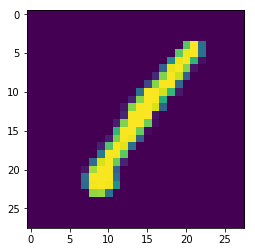

In [2]:
%matplotlib inline

plt.figure()
plt.imshow(
    train_dataset.iloc[0] # get sample (785 pixels)
                .values[1:] # remove label (784 pixels now)
                .reshape(28, 28) # reshape to image
)
plt.show()

# Build a model to analyse the data

There are many ways of analysing the dataset to find consistencies between a '1' and a '2'. The most obvious one that everyone talks about is the CNN, as it is known to score very highly and is easy to explain. Therefore, I'll just do that one to avoid people's disappointment.

I am more acquainted with TensorFlow 1.x, so I'll use that framework. In every model, you need to define these following properties:

* Placeholders: Inputs/outputs
* Convolutional Layers: 2
* Dropout: 20%
* Dense Layer Output: 10 digits
* Session


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [22]:
import tensorflow as tf

def encode_label_array(labels):
    ground_truths = np.zeros((labels.shape[0], 10))
    for i in range(labels.shape[0]):
        ground_truths[i, labels.values[i]] = 1
    return ground_truths

labels = encode_label_array(
    train_dataset['label']
)
images = train_dataset[
    train_dataset.columns[1:]
].values.reshape(
    labels.shape[0], 28, 28, 1
) / 255


model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Conv2D(
        64,
        (3, 3),
        activation=tf.nn.relu
    )
)
model.add(tf.keras.layers.MaxPool2D())
model.add(
    tf.keras.layers.Conv2D(
        64,
        (3, 3),
        activation=tf.nn.relu
    )
)
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten(input_shape=(6, 6)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(images, labels, epochs=5)


Epoch 1/5
42000/42000 [==============================] - 82s 2ms/sample - loss: 0.1709 - acc: 0.9476
Epoch 2/5
42000/42000 [==============================] - 84s 2ms/sample - loss: 0.0556 - acc: 0.9828
Epoch 3/5
42000/42000 [==============================] - 84s 2ms/sample - loss: 0.0380 - acc: 0.9879
Epoch 4/5
42000/42000 [==============================] - 86s 2ms/sample - loss: 0.0299 - acc: 0.9910
Epoch 5/5
42000/42000 [==============================] - 84s 2ms/sample - loss: 0.0245 - acc: 0.9926


In [34]:
test_images = test_dataset.values.reshape(
    test_dataset.shape[0], 28, 28, 1
) / 255

outputs = model.predict(test_images)

In [56]:
imageId = (np.arange(28000) + 1).reshape((28000, 1))
labels = np.argmax(outputs, axis=1).reshape((28000, 1))

dataset = np.concatenate([imageId, labels], axis=1)

submission = pd.DataFrame(dataset, columns=['ImageId', 'Label'])
submission.to_csv('submission.csv', index=False)

In [57]:
! head -n 10 submission.csv

ImageId,Label
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0
